# Beginning


<strong>Context</strong> </br>

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is</br></br>
<strong>Let's solve it step by step</strong>

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



In [2]:
#load data
train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


| **Feature**      | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| `id`             | Unique identifier for each mobile device.                                        |
| `battery_power`  | Total energy a battery can store in one time, measured in mAh.                   |
| `blue`           | Indicates if the mobile device has Bluetooth support (1 for Yes, 0 for No).      |
| `clock_speed`    | Speed at which the microprocessor executes instructions (measured in GHz).       |
| `dual_sim`       | Indicates if the mobile device supports dual SIM functionality (1 for Yes, 0 for No). |
| `fc`             | Front camera resolution in megapixels.                                           |
| `four_g`         | Indicates if the mobile device supports 4G connectivity (1 for Yes, 0 for No).   |
| `int_memory`     | Internal memory capacity in gigabytes (GB).                                      |
| `m_dep`          | Mobile device depth in centimeters.                                              |
| `mobile_wt`      | Weight of the mobile phone in grams.                                             |
| `n_cores`        | Number of cores in the mobile device's processor.                               |
| `pc`             | Primary camera resolution in megapixels.                                         |
| `px_height`      | Pixel resolution height of the screen.                                           |
| `px_width`       | Pixel resolution width of the screen.                                            |
| `ram`            | Random Access Memory (RAM) in megabytes (MB).                                   |
| `sc_h`           | Screen height of the mobile device in centimeters.                              |
| `sc_w`           | Screen width of the mobile device in centimeters.                               |
| `talk_time`      | Longest time that a single battery charge will last during talk time.           |
| `three_g`        | Indicates if the mobile device supports 3G connectivity (1 for Yes, 0 for No).   |
| `touch_screen`   | Indicates if the mobile device has a touch screen (1 for Yes, 0 for No).         |
| `wifi`           | Indicates if the mobile device has Wi-Fi support (1 for Yes, 0 for No).          |
| `price_range`           | This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).          |


# Explotary Data Analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
train.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
161,961,1,1.5,1,10,0,51,0.3,152,6,...,554,621,2981,15,6,7,1,1,1,2
1591,1830,0,0.5,0,0,0,7,0.9,191,6,...,460,1583,2334,8,7,14,0,1,0,2
1624,555,1,3.0,1,5,1,38,0.8,193,2,...,214,1970,1686,8,1,8,1,0,1,1
1106,1266,0,2.6,0,1,0,18,0.4,86,7,...,1187,1595,398,16,8,3,1,1,1,0
1161,1910,0,1.4,0,0,0,29,0.6,146,7,...,333,639,2944,8,7,2,1,1,1,2


<strong>As it can be seen we have 20 different features and we have 2000 non-null values</br>
Inside of 20 features we have 6 different binary features (yes = 1 or no = 0)</br>
Our data doesn't have missing data so our job will be easier</br>
And we dont have to change the data type of features

</strong>

## Univariate Analysis

In [7]:
continuousfeaturelist = ["battery_power", "clock_speed", "fc","int_memory","m_dep","mobile_wt","n_cores","pc",
         "px_height","px_width","ram","sc_h","sc_w","talk_time", "price_range"]
categoricalfeaturelist = ["blue" , "dual_sim","four_g","three_g","touch_screen","wifi"]

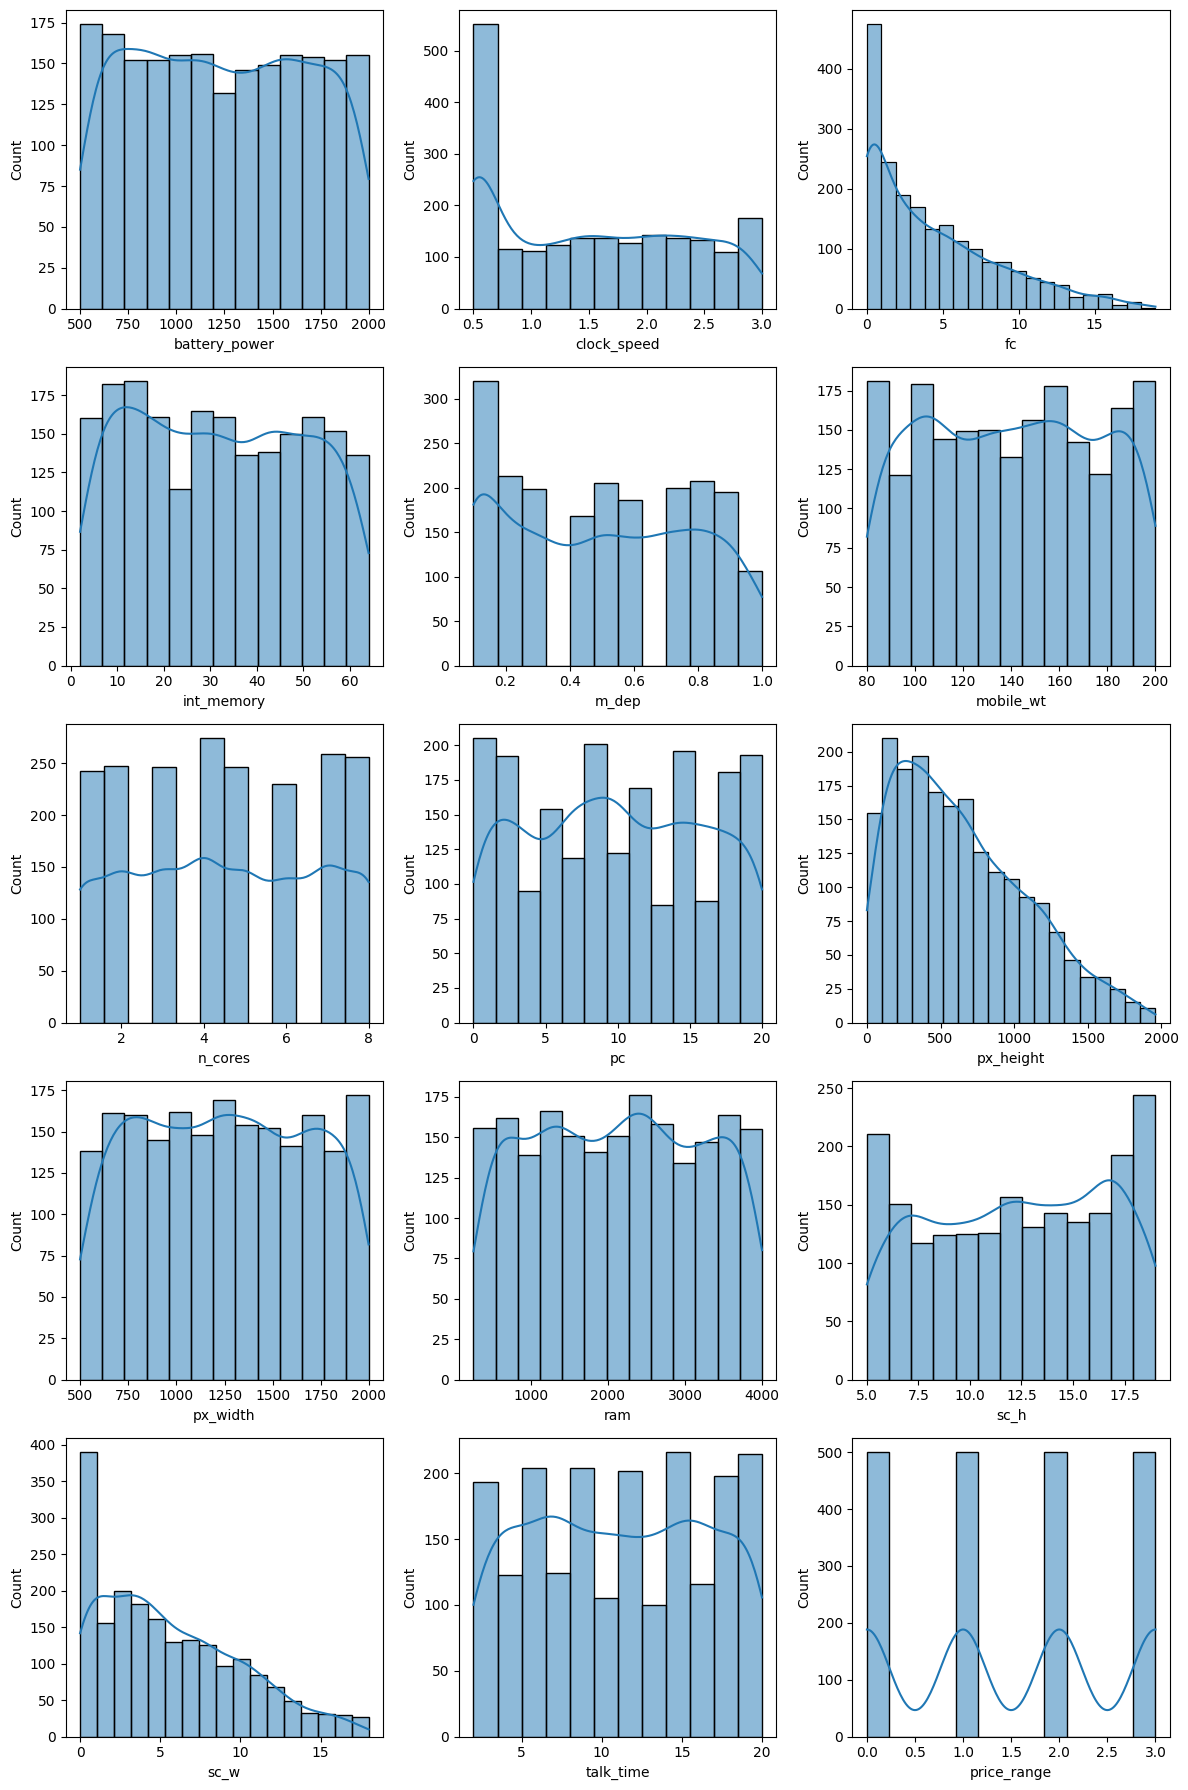

In [8]:
#for continuous features
fig , axes = plt.subplots(5,3,figsize = (12,18))
for i in range(0,15):
    row = i//3
    col = i%3
    sns.histplot(x = continuousfeaturelist[i] , data = train , kde = True ,ax = axes[row,col])

plt.tight_layout()
plt.show()

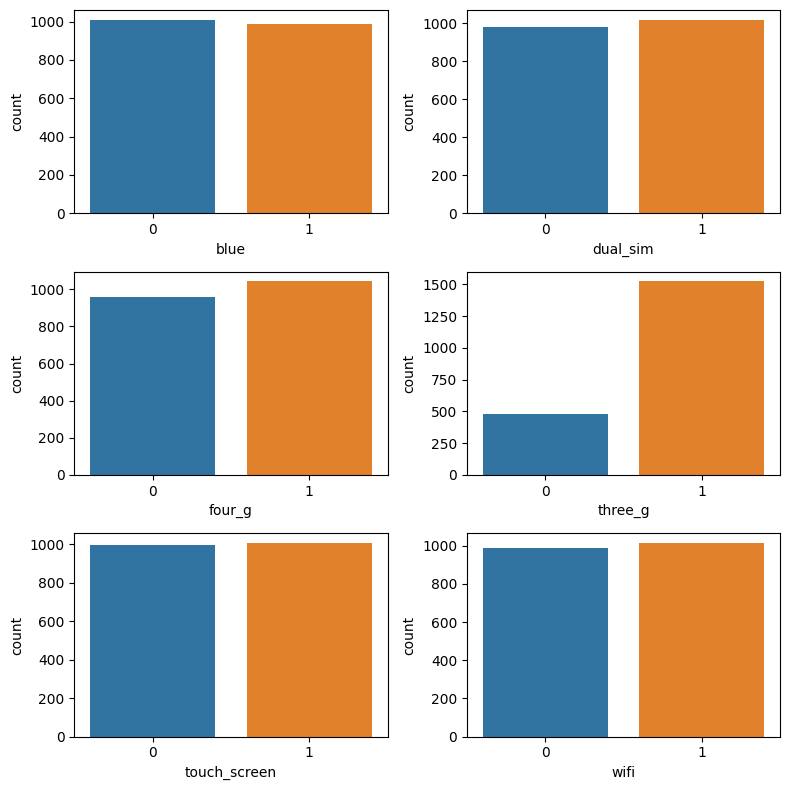

In [9]:
#for categorical features
fig , axes = plt.subplots(3,2,figsize = [8,8])
for i in range(0,6):
    row = i//2
    col = i%2
    sns.countplot(x = categoricalfeaturelist[i] , data = train, ax = axes[row,col])
plt.tight_layout()
plt.show()

Most phones have 3G, but for the other features, yes and no are nearly the same.

## Outlier Detection

<strong>We will detect the outlier values to see if our data has false , unusual entries or not</br> </br>
<font color = "red"> src : https://www.cuemath.com/outlier-formula/ </font> </strong>

<img src = "https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/outliers-using-turkey-method-1619540973.png" width = "400" height = "400">

IQR=Q3−Q1

Upper~Fence = Q3  + 1.5 IQR

Lower~Fence = Q1  - 1.5 IQR

If a value is bigger than upper-fence or lower than lower-fence we call them outlier value

Lets see outlier values of all continuous features

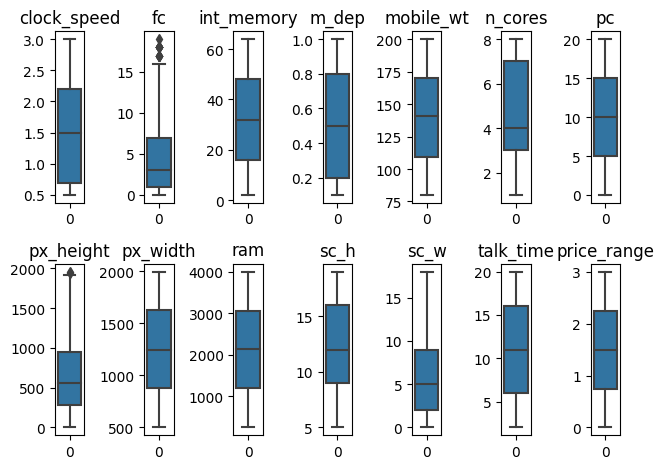

In [10]:
for i in range(1,15):
    plt.subplot(2,7,i)
    sns.boxplot(train[continuousfeaturelist[i]])
    plt.title(continuousfeaturelist[i])
plt.tight_layout()
plt.show()

<strong> As it can be seen we have some outlier values in fc and px_height features</br>
Let's look at them
</strong>

In [11]:
def outlierCalculator(valuelist):
    Q1 = np.percentile(valuelist , 25)
    Q3 = np.percentile(valuelist , 75)
    IQR = Q3-Q1
    upper_fence = Q3 + IQR*1.5
    lower_fence = Q1 - IQR*1.5
    outliers = [i for i in valuelist if i>upper_fence or i<lower_fence ]
    return outliers


In [12]:
print("fc feature's outliers : " , outlierCalculator(train["fc"]))
print("px_height feature's outliers : ",outlierCalculator(train["px_height"]))

fc feature's outliers :  [18, 17, 18, 17, 17, 18, 17, 17, 18, 18, 18, 17, 18, 18, 19, 18, 18, 18]
px_height feature's outliers :  [1949, 1960]


<strong>I decided not to remove the outlier values because these values are close to each other, and maybe the phone manufacturer is producing high-quality cameras. Also, since there are only 2 outlier values in the 'px_height' feature in a dataset of 2000 rows, it is unlikely to have a significant impact during model training. And also it prevents overtraining</strong>

## Correlation

In [13]:
train_continuous_features = train.loc[:,continuousfeaturelist]
train_continuous_features.sample(3)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
493,1902,2.8,6,50,0.8,124,8,9,1142,1393,343,11,8,18,0
1902,730,1.5,9,9,0.7,122,4,15,1371,1677,2787,10,8,7,2
946,1625,0.5,2,50,0.1,107,8,17,8,1219,670,16,3,8,0


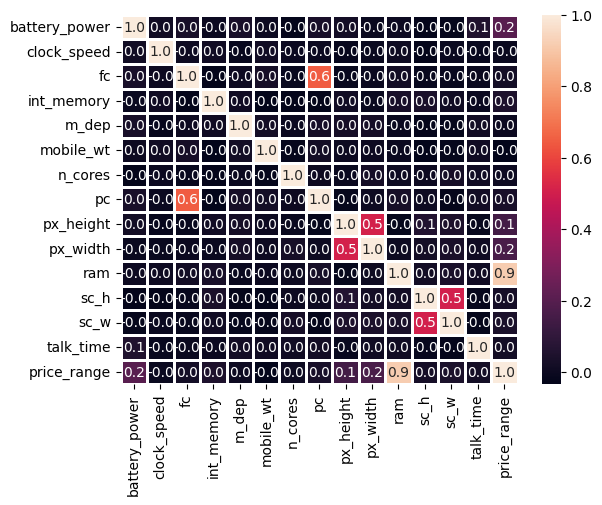

In [14]:
#Visualization
sns.heatmap(train_continuous_features.corr() , linewidths=1,annot = True,fmt = ".1f")
plt.show()

<strong>
<font color = "red">It seems RAM feature is highly correlated with price_range that is very important</font> </br>
primary camera resolution (pc) and front camera resolution (fc) has the biggest correlation</br> 
and also sc_h - sc_w , px_width - px_height has like 0.5 correlation</br>
maybe we will delete one of two features to make our model learn faster</strong>

# Feature Engineering

## Normalization

<strong> Means of normalization is simply fitting our data into 0-1 scale </br>

<font color = "red"> src : https://www.educba.com/normalization-formula/ </font></strong>

<img src = "https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg"  height =  "400"  width = "400">


In [15]:
#split train data
y = train["price_range"]
x = train.drop(columns = "price_range")

In [16]:
#for normalization
for i in x.columns:
    x[i] = [ (j-np.min(x[i])) /   (np.max(x[i]) - np.min(x[i]))  for j in x[i]]
    

Maybe we can multiply correlated features and create new features, but we can't predict how it will affect our model's performance. That's why we will try multiplying correlated features with each other during model training.

# Prediction

## Model Selection

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV , StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from skopt.space import Real , Integer , Categorical
from skopt import gp_minimize
from functools import partial

In [18]:
#train - test split
x_train , x_val , y_train , y_val = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [19]:
logreg = LogisticRegression()
gaussiannb = GaussianNB()
dectree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svm = SVC(probability = True)
knearest = KNeighborsClassifier()
gradboost = GradientBoostingClassifier()
classifiers = [randomforest , knearest ,logreg ,
               dectree , gaussiannb ,gradboost ,svm  ]
classifiernames = ["RandomForestClassifier" , "KNeighborsClassifier" ,"LogisticRegression" ,
               "DecisionTreeClassifier" , "GaussianNB" , "GradientBoostingClassifier","SVC"  ]

In [20]:
#prediction without hyperparameter tuning
for i in range(0,7):
    classifier = classifiers[i]
    classifier.fit(x_train , y_train)
    y_pred = classifier.predict(x_val)
    accuracy = accuracy_score(y_pred , y_val)
    print("Accuracy of ",classifiernames[i] , " is : " , accuracy)
    

Accuracy of  RandomForestClassifier  is :  0.8875
Accuracy of  KNeighborsClassifier  is :  0.4175
Accuracy of  LogisticRegression  is :  0.94
Accuracy of  DecisionTreeClassifier  is :  0.83
Accuracy of  GaussianNB  is :  0.7975
Accuracy of  GradientBoostingClassifier  is :  0.905
Accuracy of  SVC  is :  0.8625


In [21]:
#merge some best algorithms
vtc = VotingClassifier(
    estimators = 
    [("svm" , svm) ,
     ("logreg" ,logreg) ,
     ("gradboost", gradboost) ,
     
    ] , voting = "soft")
vtc.fit(x_train , y_train)
y_pred = vtc.predict(x_val)
accuracy = accuracy_score(y_pred , y_val)
print("accuracy : " , accuracy)

accuracy :  0.9275


<strong>We get nearly 0.90 acc rate with votingclassifier </br> </strong> 


## Hyperparameter Tuning

<strong>First of all, hyperparameters are the parameters of a model whose effect on the model's performance is unpredictable when changed. You need to try different values to find the best parameters.</strong>

In [22]:
#libraries for hyperopt
from skopt import gp_minimize
from skopt.space import Real , Categorical , Integer
from functools import partial
from hyperopt import Trials , tpe , hp , fmin
from hyperopt.pyll import scope
#libraries for optuna
import optuna
from optuna import visualization as vis
from optuna import create_study as crt
from functools import partial


In [23]:
#with gridsearch
randforest = RandomForestClassifier()
logreg = LogisticRegression()
randforest.fit(x,y)
logreg.fit(x,y)
randforest_grid = {
"n_estimators" : [100,200,300],
"max_depth" : [3,5,8],
"criterion" : ["gini" , "entropy"]}

logreg_grid = {
    "C" : [0.001 , 0.01 , 1  , 0.1 , 0.000001],
    "penalty" : ["l1" , "l2"],
    "solver" : ["lbfgs" , "sag" , "saga" , "newton_cg" , "liblinear"]
    }
ranges = [
    randforest_grid , 
    logreg_grid
]
models = [
    randforest,
    logreg
]

for i in range(0,2):
    gridsrcmodel = GridSearchCV(
    estimator = models[i] ,
    param_grid = ranges[i] ,
    scoring = "accuracy" ,
    verbose = 2,
    cv = 5)
gridsrcmodel.fit(x , y)
print(gridsrcmodel.best_score_)
print(gridsrcmodel.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1

In [24]:
#with randomizedsearch
rdtree = RandomForestClassifier()
logreg = LogisticRegression()
randforest_grid= {
"max_depth" : np.arange(10,30,5),
"n_estimators": np.arange(50,300,50),
"criterion":["gini","entropy"]
    }
logreg_grid = {
    "C" : [0.001 , 0.01 , 1  , 0.1 , 0.000001],
    "penalty" : ["l1" , "l2"],
    "solver" : ["lbfgs" , "sag" , "saga" , "newton_cg" , "liblinear"]
    }
ranges = [
    logreg_grid,
    randforest_grid , 
    
]
models = [
    logreg,
    randforest,
    
]
for i in range(0,2):
    randomizedmodel = RandomizedSearchCV(
    estimator = models[i] ,
    param_distributions = ranges[i] ,
    scoring = "accuracy" ,
    verbose = 2,
    cv = 5)
randomizedmodel.fit(x , y)
print("best score : " , randomizedmodel.best_score_)
print("best params :" , randomizedmodel.best_estimator_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...criterion=entropy, max_depth=15, n_estimators=50; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=15, n_estimators=50; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=15, n_estimators=50; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=15, n_estimators=50; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=15, n_estimators=50; total time=   0.3s
[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV] END .....criterion=gini, max_depth=15, n_estimators=100; total time=   0.4s
[CV] END .....criterion=gini, max_depth=10, n_estimators=100; total time=   0.4s
[CV] END .....criterion=gini, max_depth=10, n_es

In [25]:
#with gp_minimize bayesian optimization
def func(params , param_names , x , y):
    params = dict(zip(param_names ,params ))
    estimator = RandomForestClassifier(**params)
    kfold = StratifiedKFold(n_splits = 5)
    acc_rates = []
    for train_idx , test_idx in kfold.split(X = x , y = y):
        x_train , y_train  = x.iloc[train_idx] , y[train_idx]
        x_test , y_test = x.iloc[test_idx] , y[test_idx]
        estimator.fit(x_train , y_train)
        y_pred = estimator.predict(x_test)
        acc_score = accuracy_score(y_pred , y_test)
        acc_rates.append(acc_score)
    
    return -(np.mean(acc_rates))
param_range = [
     
    
    Real(0.01 , 1 , name = "max_features"),
    Integer(10,200,name = "n_estimators"),
    Categorical(["gini" , "entropy"] , name = "criterion"),
    Integer(5,20 , name = "max_depth")
]

param_names = [
    "max_features",
    "n_estimators",
    "criterion",
    "max_depth"
]
opt_func = partial(func ,param_names = param_names,x = x , y = y)
result = gp_minimize(
    opt_func,
    param_range,
    n_calls = 10,
    n_random_starts = 5,
    verbose = 2,
    n_jobs = -1,
)

print(dict(zip(param_names , result.x)))

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2586
Function value obtained: -0.8635
Current minimum: -0.8635
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 5.0876
Function value obtained: -0.9105
Current minimum: -0.9105
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.9726
Function value obtained: -0.8505
Current minimum: -0.9105
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.3810
Function value obtained: -0.9045
Current minimum: -0.9105
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 4.9929
Function value obtained: -0.8945
Current minimum: -0.9105
Iteration No: 6 started. 

In [26]:
#with hyperopt
def opt_function(params, x , y):
    print(params)
    model_name = params.pop("model")
    if model_name == "RandomForest":
        estimator = RandomForestClassifier(**params)
        kfold = StratifiedKFold(n_splits = 5)
        acc_rates = []
        for train_idx , test_idx  in kfold.split(X = x , y = y):
            x_train , y_train = x.iloc[train_idx] , y[train_idx]
            x_test , y_test =  x.iloc[test_idx] , y[test_idx]
            estimator.fit(x_train , y_train)
            y_pred = estimator.predict(x_test)
            acc_rate = accuracy_score(y_pred , y_test)
            acc_rates.append(acc_rate)
        return -(np.mean(acc_rates))
    else:
        if(params["solver"] == "lbfgs" or params["solver"] == "sag" or params["solver"] == "newton-cg" and params["penalty"] == "l1" ):
            params["penalty"] = "l2"
        estimator = LogisticRegression(**params)
        kfold = StratifiedKFold(n_splits = 5)
        acc_rates = []
        for train_idx , test_idx  in kfold.split(X = x , y = y):
            x_train , y_train = x.iloc[train_idx] , y[train_idx]
            x_test , y_test =  x.iloc[test_idx] , y[test_idx]
            estimator.fit(x_train , y_train)
            y_pred = estimator.predict(x_test)
            acc_rate = accuracy_score(y_pred , y_test)
            acc_rates.append(acc_rate)
        return -(np.mean(acc_rates))
        
    
    

params = hp.choice(

    "model_name",[
        
        {
        "model" : "RandomForest",
        "max_features" :  hp.uniform("max_features" , 0.01 , 1),
        "n_estimators" : scope.int(hp.quniform("n_estimators" , 50 , 300,1)),
        "criterion" : hp.choice("criterion",["gini" , "entropy"]),
        "max_depth" :  scope.int(hp.quniform("max_depth" , 5 , 20,1))},

        
        { 
        "model" : "LogisticRegression",
        "C" : hp.uniform("C" , 0.00001 , 1),
        "solver" : hp.choice("lr_solver" , [
            "lbfgs",
            "saga",
            "sag",
            "liblinear",
            "newton-cg"
             ]),
        "penalty" : hp.choice("lr_penalty" , ["l1" , "l2"])

            
            
        }  

        

    
    ])
obj = partial(opt_function , x = x , y = y)
trials = Trials()
result = fmin(
    obj,
    params,
    algo = tpe.suggest,
    trials = trials,
    verbose = 2,
    max_evals = 15,
)

print(dict(zip(param_names , result.values())))


{'criterion': 'gini', 'max_depth': 11, 'max_features': 0.9726520885513477, 'model': 'RandomForest', 'n_estimators': 115}
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 0.8160252582641749, 'model': 'RandomForest', 'n_estimators': 229}
{'C': 0.7230997329881084, 'model': 'LogisticRegression', 'penalty': 'l2', 'solver': 'saga'}
{'C': 0.2603972508190818, 'model': 'LogisticRegression', 'penalty': 'l2', 'solver': 'newton-cg'}
{'C': 0.9009492600344486, 'model': 'LogisticRegression', 'penalty': 'l2', 'solver': 'newton-cg'}
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 0.5243751999252814, 'model': 'RandomForest', 'n_estimators': 146}
{'C': 0.03934003712622345, 'model': 'LogisticRegression', 'penalty': 'l2', 'solver': 'liblinear'}
{'C': 0.00030300195065890756, 'model': 'LogisticRegression', 'penalty': 'l1', 'solver': 'sag'}
{'C': 0.11676102280821134, 'model': 'LogisticRegression', 'penalty': 'l2', 'solver': 'newton-cg'}
{'criterion': 'gini', 'max_depth': 18, 'max_features':

In [27]:
#with optuna
#Parameter names
param_names = [
    "max_features",
    "n_estimators",
    "criterion",
    "max_depth"
]
#Ranges that optuna will search
def suggest_params(trial):
    params = {
        "max_features" : trial.suggest_float("max_features" , 0.01 , 1),
        "n_estimators" : trial.suggest_int("n_estimators",10,100),
        "criterion"    : trial.suggest_categorical("criterion" , ["gini" , "entropy"]),
        "max_depth"    : trial.suggest_int("max_depth " , 5,10)
    }
    return params
#As it can be seen our function that I used is RandomForestClassifier
def opt_func(trial , x , y):
    params = suggest_params(trial)
    kfold = StratifiedKFold(n_splits = 5)
    rdmodel = RandomForestClassifier(**params)
    acc_scores = []
    for train_idx , test_idx in kfold.split(X = x , y = y):
        x_train , y_train = x.iloc[train_idx] , y[train_idx]
        x_test , y_test = x.iloc[test_idx] , y[test_idx]
        rdmodel.fit(x_train , y_train)
        y_pred = rdmodel.predict(x_test)
        acc_score = accuracy_score(y_pred , y_test)
        acc_scores.append(acc_score)
    return -(np.mean(acc_scores))
opt = partial(opt_func , x = x , y = y)
study = crt(direction = "minimize")
study.optimize(opt , n_trials = 15)
print(study.best_params)
print("best_value : " , study.best_value)


[I 2025-04-27 13:51:38,104] A new study created in memory with name: no-name-9092b411-fdbb-4c1f-bdc0-cccfe957ebdf
[I 2025-04-27 13:51:40,410] Trial 0 finished with value: -0.8815 and parameters: {'max_features': 0.6669081585577135, 'n_estimators': 78, 'criterion': 'gini', 'max_depth ': 6}. Best is trial 0 with value: -0.8815.
[I 2025-04-27 13:51:41,386] Trial 1 finished with value: -0.8889999999999999 and parameters: {'max_features': 0.5462226344967418, 'n_estimators': 31, 'criterion': 'entropy', 'max_depth ': 6}. Best is trial 1 with value: -0.8889999999999999.
[I 2025-04-27 13:51:43,051] Trial 2 finished with value: -0.8805 and parameters: {'max_features': 0.5220342005433721, 'n_estimators': 66, 'criterion': 'gini', 'max_depth ': 6}. Best is trial 1 with value: -0.8889999999999999.
[I 2025-04-27 13:51:44,652] Trial 3 finished with value: -0.8924999999999998 and parameters: {'max_features': 0.6409501797014855, 'n_estimators': 48, 'criterion': 'gini', 'max_depth ': 8}. Best is trial 3 

{'max_features': 0.8555633618018518, 'n_estimators': 79, 'criterion': 'entropy', 'max_depth ': 8}
best_value :  -0.9065


In [28]:
#Visualization
vis.plot_param_importances(study).show()
vis.plot_optimization_history(study).show()

## Prediction with ANN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
model = Sequential()
model.add(Input(shape = (20,))) # 20 for 20 features
model.add(Dense(units = 8 , activation = "elu"))
model.add(Dense(units = 16 , activation = "elu" ))
model.add(Dense(units = 4 , activation = "softmax"))
model.compile(optimizer = Adam(learning_rate = 0.0001) ,loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])
model.fit(x = x_train , y = y_train , batch_size = 30 , epochs = 1000 , shuffle = True , verbose = 2, validation_data = [x_val , y_val])
#Note : when training the model with fit() function validation data is not included in the training process


Epoch 1/1000
54/54 - 1s - 28ms/step - accuracy: 0.2256 - loss: 1.4521 - val_accuracy: 0.2225 - val_loss: 1.4540
Epoch 2/1000
54/54 - 0s - 3ms/step - accuracy: 0.2319 - loss: 1.4407 - val_accuracy: 0.2225 - val_loss: 1.4436
Epoch 3/1000
54/54 - 0s - 3ms/step - accuracy: 0.2400 - loss: 1.4306 - val_accuracy: 0.2400 - val_loss: 1.4341
Epoch 4/1000
54/54 - 0s - 2ms/step - accuracy: 0.2469 - loss: 1.4215 - val_accuracy: 0.2500 - val_loss: 1.4252
Epoch 5/1000
54/54 - 0s - 3ms/step - accuracy: 0.2506 - loss: 1.4129 - val_accuracy: 0.2600 - val_loss: 1.4174
Epoch 6/1000
54/54 - 0s - 2ms/step - accuracy: 0.2600 - loss: 1.4048 - val_accuracy: 0.2625 - val_loss: 1.4091
Epoch 7/1000
54/54 - 0s - 3ms/step - accuracy: 0.2719 - loss: 1.3974 - val_accuracy: 0.2775 - val_loss: 1.4016
Epoch 8/1000
54/54 - 0s - 2ms/step - accuracy: 0.2750 - loss: 1.3903 - val_accuracy: 0.2850 - val_loss: 1.3951
Epoch 9/1000
54/54 - 0s - 2ms/step - accuracy: 0.2844 - loss: 1.3835 - val_accuracy: 0.2900 - val_loss: 1.3881


# Evaluating multiple models with ROC curve

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [31]:
#Convert integer values to one hot encoding
y_valonehot = label_binarize(y_val , classes = [0,1,2,3])

In [32]:
#Our Fine Tuned RFclassifier
#To clean empty spaces in a string we use strip function
cleaned_params = {key.strip(): value for key, value in study.best_params.items()}
rdmodel = RandomForestClassifier(**cleaned_params)

#Fine Tuned LogisticRegression
lrmodel = LogisticRegression(**gridsrcmodel.best_params_)

In [33]:
#Prediction with ann
y_predann = model.predict(x_val)
#Prediction with rdforest
rdmodel.fit(x_train , y_train)
y_predrd = rdmodel.predict_proba(x_val)
#Prediction with logisticregression
lrmodel.fit(x_train , y_train)
y_predlr = lrmodel.predict_proba(x_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [34]:
n_classes = y_predann.shape[1]
fprforann = dict()
tprforann = dict()
fprforrd = dict()
tprforrd = dict()
fprforlr = dict()
tprforlr = dict()
auc = dict()
for i in range(n_classes):
    fprforann[i] , tprforann[i] , treshold = roc_curve(y_valonehot[:,i] , y_predann[:,i])
    fprforrd[i] , tprforrd[i] , treshold = roc_curve(y_valonehot[:,i] , y_predrd[:,i])
    fprforlr[i] , tprforlr[i] , treshold = roc_curve(y_valonehot[:,i] , y_predlr[:,i])

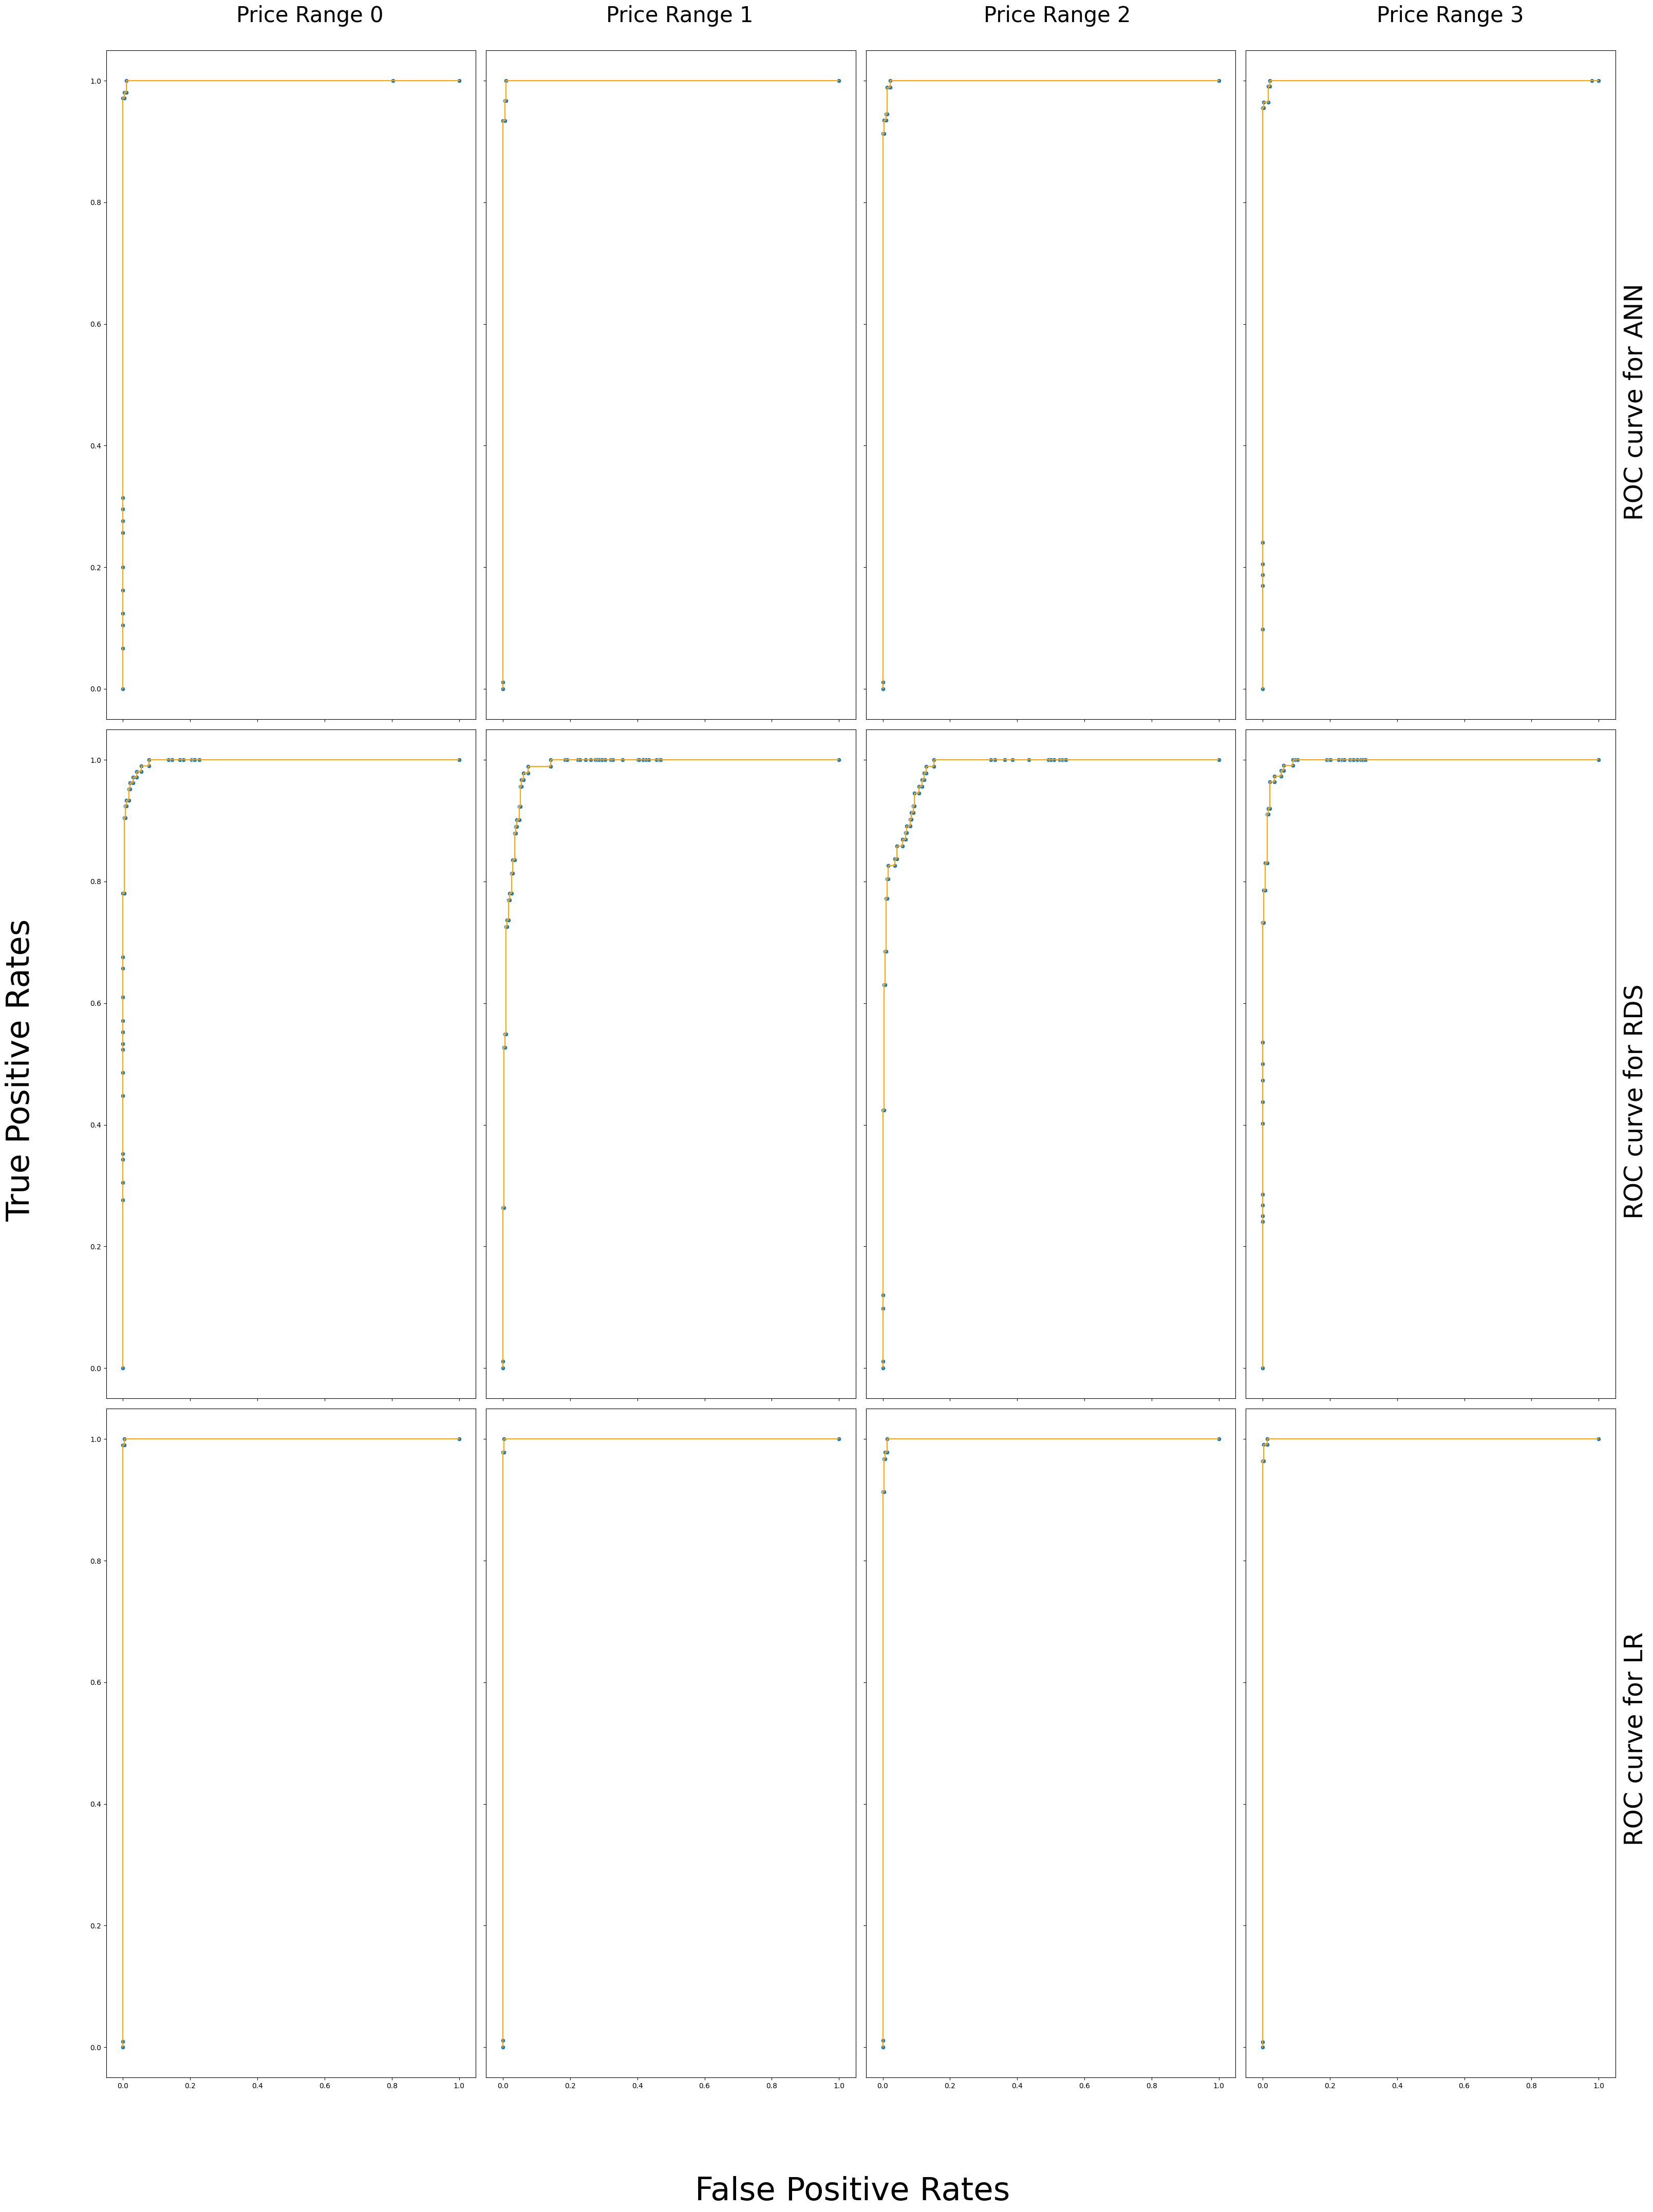

In [35]:
fig , axes = plt.subplots(3,4 , sharey = True , sharex=True , figsize = (30,40))
for i in range(3):
    for j in range(4):
        if i == 0:
            sns.scatterplot(x = fprforann[j] , y = tprforann[j], ax = axes[i,j])
            axes[i, j].plot(fprforann[j], tprforann[j], color='orange')
        elif i ==1:
            sns.scatterplot(x = fprforrd[j] , y = tprforrd[j],ax = axes[i,j])
            axes[i, j].plot(fprforrd[j], tprforrd[j], color='orange')
        else:
            sns.scatterplot(x = fprforlr[j] , y = tprforlr[j], ax = axes[i,j])
            axes[i, j].plot(fprforlr[j], tprforlr[j], color='orange')

fig.text(0.5, -0.05, 'False Positive Rates', ha='center' , size = 45)
fig.text(-0.05, 0.5, 'True Positive Rates', va='center', rotation='vertical',size = 45 )
fig.text(0.1,1.01 , 'Price Range 0' , size = 30 )
fig.text(0.34,1.01 , 'Price Range 1', size = 30 )
fig.text(0.585,1.01 , 'Price Range 2', size = 30 )
fig.text(0.84,1.01 , 'Price Range 3', size = 30 )
fig.text(1.00 , 0.77 , "ROC curve for ANN" , rotation = "vertical" , size = 35)
fig.text(1.00 , 0.43 , "ROC curve for RDS" , rotation = "vertical",size = 35)
fig.text(1.00 , 0.125 , "ROC curve for LR" , rotation = "vertical",size = 35)

fig.tight_layout()
plt.show()
   

---

### 📌 Thank You for Reading!

*I appreciate you taking the time to explore this work. If you found it helpful or interesting, feel free to leave feedback or connect!*

---
